In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
from colour import wavelength_to_XYZ

In [2]:
from chromalab.observer import Observer, Cone, getsRGBfromWavelength, transformToDisplayChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.maxdisplaybasis import *
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import Animation

objc[29127]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b2386e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2ce75e6f0). One of the two will be used. Which one is undefined.
objc[29127]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b2386db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2ce75e718). One of the two will be used. Which one is undefined.
objc[29127]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b2386e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [4]:
wavelengths = np.arange(400, 700, 4)
d65 = Illuminant.get("D65")

In [5]:
# Equally spaced cones for debugging / learning
# cones = [Cone.cone(x, wavelengths=wavelengths, template="neitz", od=0.35) for x in [450, 500, 550, 600]]
# tetrachromat = Observer(cones, illuminant=d65, verbose=True)

In [6]:
tetrachromat = Observer.tetrachromat(wavelengths, d65, verbose=True)
# tetrachromat = Observer.neitz_tetrachromat(wavelengths, d65)
maxbasis = MaxBasis(tetrachromat, verbose=True)
# viz = PSWrapper(tetrachromat, maxbasis, itemsToDisplay=PSWrapper.ItemsToDisplay.BOTH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True) 

100%|██████████| 72/72 [00:06<00:00, 11.83it/s]


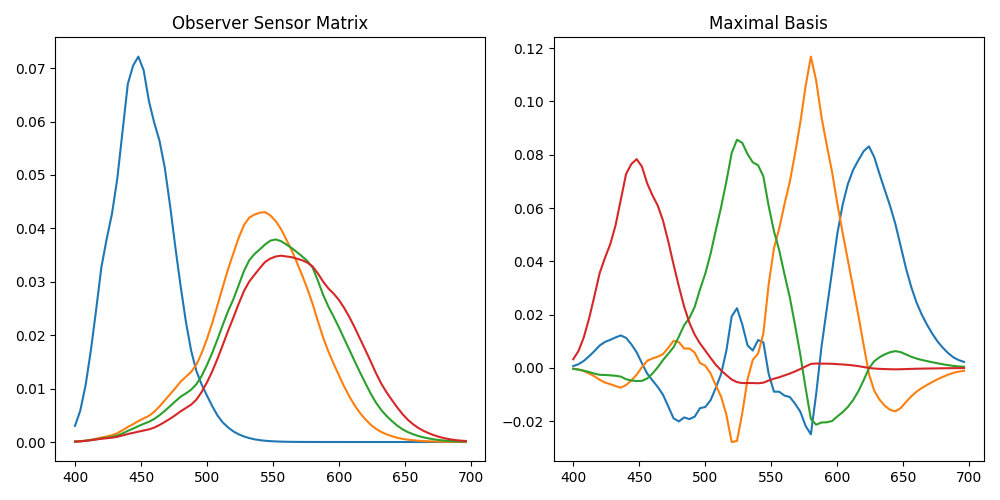

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot observer.sensor_matrix on the left subplot
axs[0].plot(tetrachromat.wavelengths, tetrachromat.normalized_sensor_matrix.T)
axs[0].set_title('Observer Sensor Matrix')

# Plot the existing plot on the right subplot
[axs[1].plot(maxbasis.wavelengths, x.data )for x in maxbasis.get_cmf()]
axs[1].set_title('Maximal Basis')

plt.tight_layout()
plt.show()

In [16]:
mdb = TetraDisplayGamut.loadTutenLabDisplay(tetrachromat, led_indices=[0, 3, 4, 5])

AssertionError: 

In [ ]:
mdb = TetraDisplayGamut(tetrachromat, chromaticity_diagram_type=ChromaticityDiagramType.LaserPoint, transformMatrix=maxbasis.get_cone_to_maxbasis_transform())

In [ ]:
points_4d= mdb.matrix
points = (points_4d / np.sum(points_4d, axis = 0)).T
plotAxisAlignedProjections4D(points)

In [ ]:
mdb.displayPrimariesInMaxSimplex()

In [ ]:
points_rggb= maxbasis.get_cone_to_maxbasis_transform()@mdb.matrix
rggb_points_chrom = (points_rggb / np.sum(points_rggb, axis = 0)).T
plotAxisAlignedProjections4D(rggb_points_chrom)

In [ ]:
points = (getHeringMatrix(4)@rggb_points_chrom.T).T

# theta = -np.pi/6
# new_points = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])@points[:, 1:].T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 1], points[:, 2], points[:, 3], c=np.arange(len(points)), cmap='coolwarm', marker='o', alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()